# BIKE SHARING - MLR

#### PROBLEM STATEMENT:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.<br>
<br>     
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.<br>
 <br>      
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.

The company wants to know:
 - Which variables are significant in predicting the demand for shared bikes. </li>
 - How well those variables describe the bike demand</li>
   

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.


#### BUSINESS GOAL:

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.



# Step 1: Reading and Understanding the Data


In [487]:
import warnings
warnings.filterwarnings('ignore')

In [488]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [489]:
# Read dataset

bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Step2 :EDA

In [490]:
bike.shape

(730, 16)

In [491]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [492]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [493]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [494]:
# Renaming the columns for better understanding

bike.rename(columns = {'yr':'year', 'mnth':'months', 'hum':'humidity', 'cnt':'count'}, inplace= 'True')
bike.head()

,instant,dteday,season,year,months,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [495]:
# Checking for duplicate entries and dropping if any

bike_dup = bike

bike_dup.drop_duplicates(subset = None, inplace = None)
bike_dup.shape

# No duplicate rows found.

(730, 16)

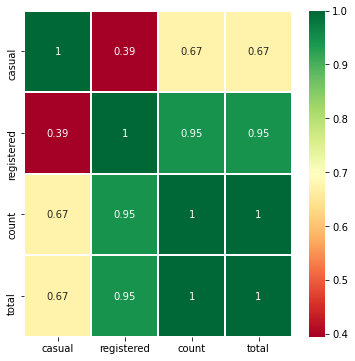

In [496]:
# Removing redundant columns
bike_cnt = bike[['casual', 'registered', 'count']]

bike_cnt['total'] = bike_cnt['casual'] + bike_cnt['registered']

plt.figure(figsize = (6,6))
ax = sns.heatmap(bike_cnt.corr(), annot = True, cmap='RdYlGn', linewidth = 1)
plt.show()

In [497]:
bike.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)
bike.shape

(730, 12)

# Step 3: Visualisation

## 3.1 Replacing categorical columns

In [498]:
# Season
bike.season.replace((1,2,3,4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace = True)
bike.season.value_counts(normalize = True)

Fall      0.257534
Summer    0.252055
Spring    0.246575
Winter    0.243836
Name: season, dtype: float64

In [499]:
# Months
bike.months.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike.months.value_counts(normalize=True)

May    0.084932
Dec    0.084932
Oct    0.084932
Aug    0.084932
Jan    0.084932
Mar    0.084932
Jul    0.084932
Sep    0.082192
Jun    0.082192
Nov    0.082192
Apr    0.082192
Feb    0.076712
Name: months, dtype: float64

In [500]:
# Weathersit
bike.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike.weathersit.value_counts(normalize=True)

Clear             0.634247
Misty             0.336986
Light_rainsnow    0.028767
Name: weathersit, dtype: float64

In [501]:
# Weekday
bike.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bike.weekday.value_counts(normalize=True)

Monday       0.143836
Tuesday      0.143836
Sunday       0.142466
Saturday     0.142466
Thursday     0.142466
Wednesday    0.142466
Friday       0.142466
Name: weekday, dtype: float64

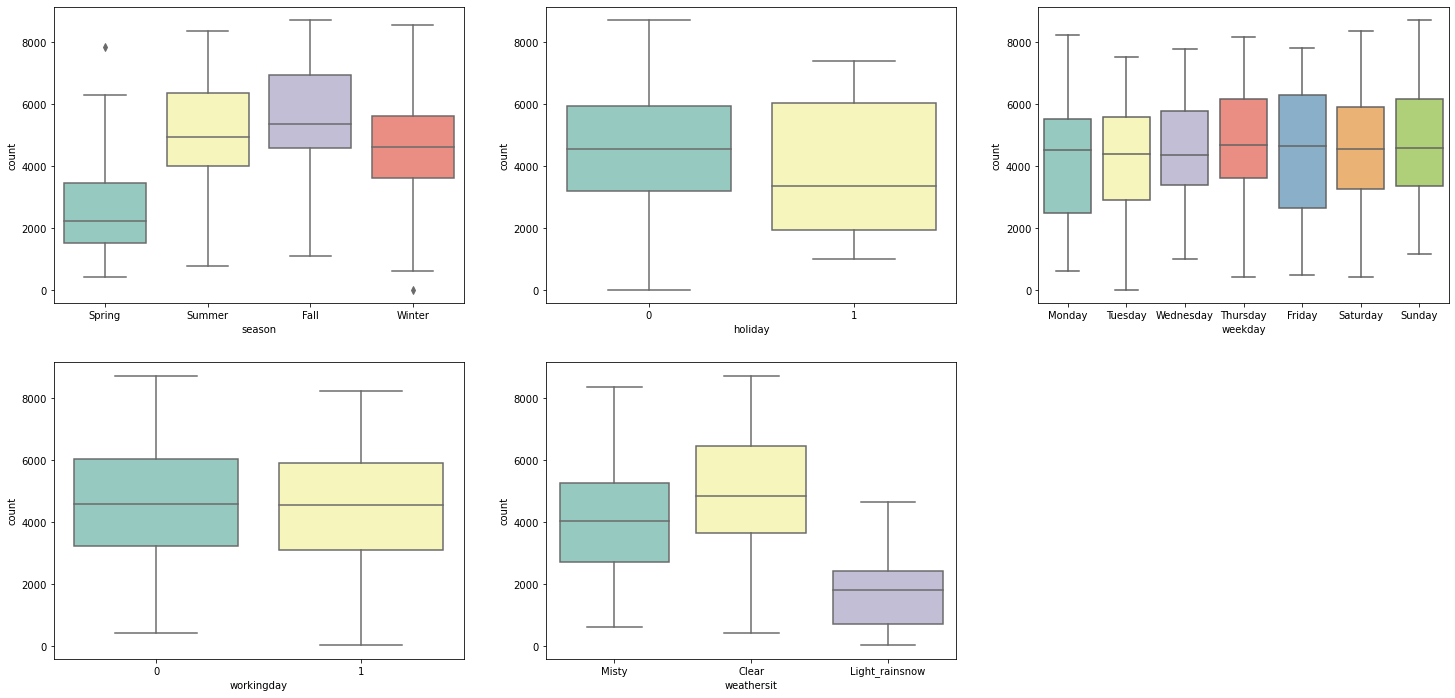

In [502]:
def boxplot_cat_var(cat_var,target):
    plt.figure(figsize=(25, 12))
    for i in range(0,len(cat_var)):
        plt.subplot(2,3,i+1)
        
        sns.boxplot(x = cat_var[i], y = target, data = bike, palette="Set3")
    plt.show()

cat_var =['season','holiday','weekday','workingday','weathersit']
boxplot_cat_var(cat_var,'count')

### INFERENCE:
**SEASON**: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

**WEATHERSIT**: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

**HOLIDAY**: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

**WEEKDAY**: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

**WORKINGDAY**: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

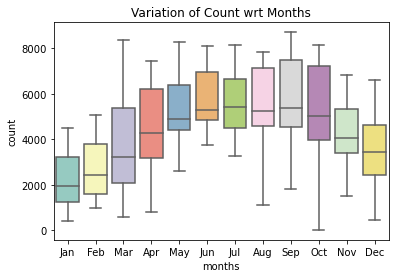

In [503]:
sns.boxplot(x = 'months', y = 'count', data = bike , palette="Set3").set_title('Variation of Count wrt Months')
plt.show()

**INFERENCE** 
Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

In [504]:
# Function to generate statistics for categorical variables

def catg_stats(col):
    cat_df = bike.groupby(col)['count'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/bike['count'].sum()*100
    cat_df['count_perc']=cat_df['count']/bike['count'].count()*100
    return round(cat_df,2)

In [505]:
# Functions to generate plots for categorical variables

def catg_plots(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col, 'count', data= bike)
    plt.subplot(1,2,2)
    sns.barplot(col, 'count', data= bike, hue = 'year', palette="vlag")
    plt.legend(labels=['2018', '2019'])
    return

### Season

In [506]:
catg_stats('season')

,sum,mean,count,sum_perc,count_perc
season,,,,,
Fall,1061129,5644.30,188,32.24,25.75
Summer,918589,4992.33,184,27.91,25.21
Winter,841613,4728.16,178,25.57,24.38
Spring,469514,2608.41,180,14.27,24.66


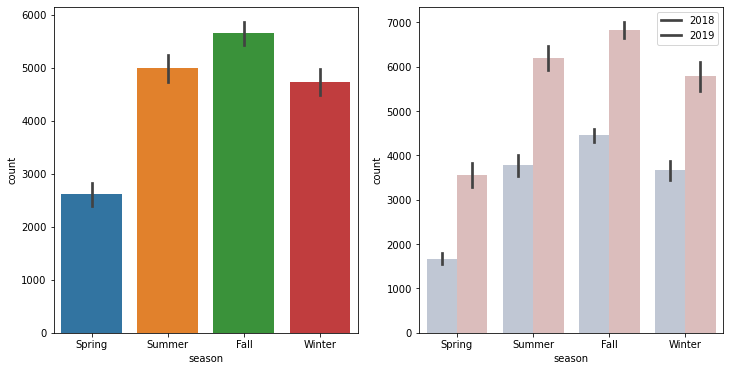

In [507]:
catg_plots('season', 12,6, )

### Month

In [508]:
catg_stats('months')

,sum,mean,count,sum_perc,count_perc
months,,,,,
Aug,351194,5664.42,62,10.67,8.49
Jun,346342,5772.37,60,10.52,8.22
Sep,345991,5766.52,60,10.51,8.22
Jul,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
Apr,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
Mar,228920,3692.26,62,6.96,8.49


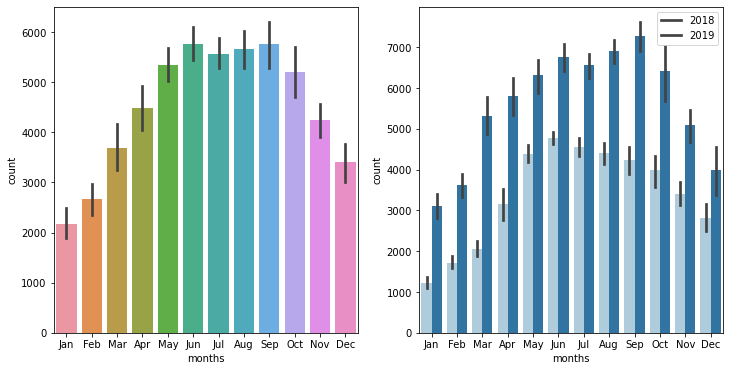

In [509]:
cat_plots('months', 12,6)

### Weather

In [510]:
catg_stats('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Misty,995024,4044.81,246,30.24,33.70
Light_rainsnow,37869,1803.29,21,1.15,2.88


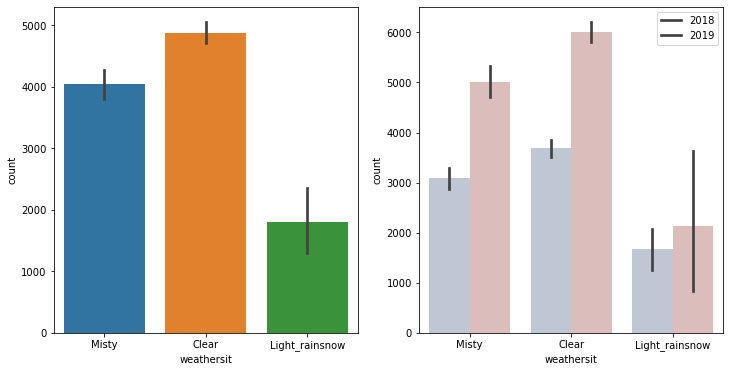

In [511]:
catg_plots('weathersit', 12,6)

### Weekday

In [512]:
catg_stats('weekday')

,sum,mean,count,sum_perc,count_perc
weekday,,,,,
Thursday,487923,4691.57,104,14.83,14.25
Sunday,485235,4665.72,104,14.74,14.25
Saturday,481176,4626.69,104,14.62,14.25
Friday,478132,4597.42,104,14.53,14.25
Wednesday,462276,4444.96,104,14.05,14.25
Tuesday,448822,4274.50,105,13.64,14.38
Monday,447281,4259.82,105,13.59,14.38


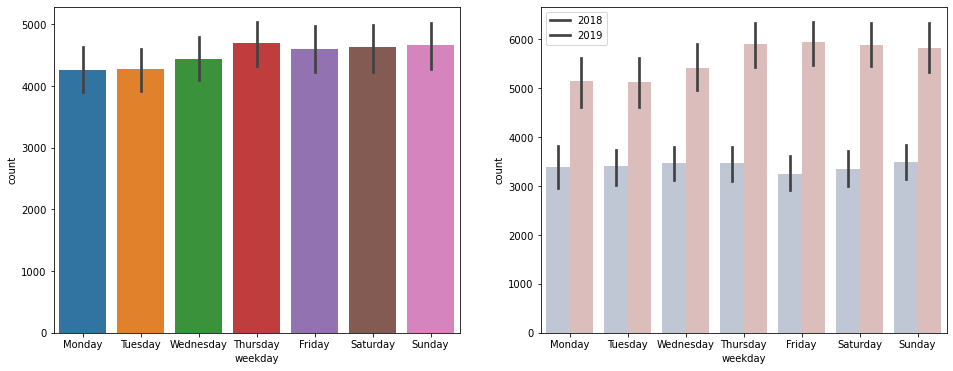

In [513]:
catg_plots('weekday',16,6)

### Working Day

In [514]:
catg_stats('workingday')

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2253988,4472.20,504,68.49,69.04
0,1036857,4587.86,226,31.51,30.96


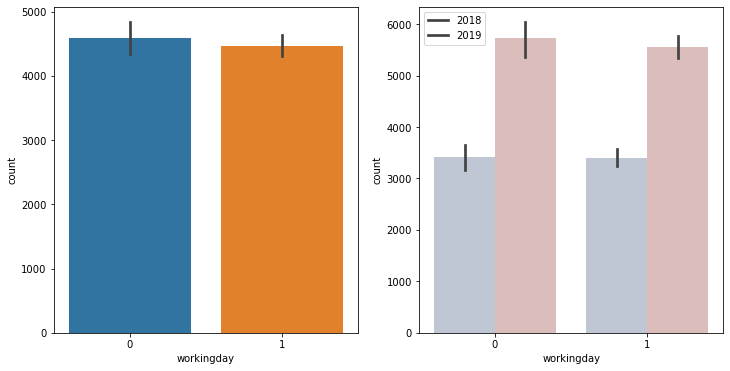

In [515]:
catg_plots('workingday', 12,6)

### Year

In [516]:
catg_stats('year')

,sum,mean,count,sum_perc,count_perc
year,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


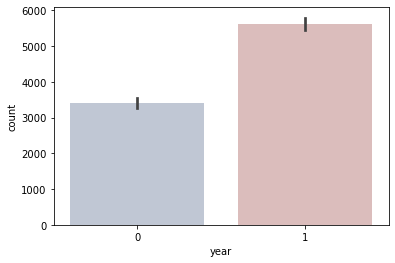

In [517]:
sns.barplot('year', 'count', data= bike, palette="vlag")
plt.show()

In [518]:
bike.tail()

,season,year,months,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
725,Spring,1,Dec,0,Friday,1,Misty,10.420847,11.33210,65.2917,23.458911,2114
726,Spring,1,Dec,0,Saturday,0,Misty,10.386653,12.75230,59.0000,10.416557,3095
727,Spring,1,Dec,0,Sunday,0,Misty,10.386653,12.12000,75.2917,8.333661,1341
728,Spring,1,Dec,0,Monday,1,Clear,10.489153,11.58500,48.3333,23.500518,1796
729,Spring,1,Dec,0,Tuesday,1,Misty,8.849153,11.17435,57.7500,10.374682,2729


## Numeric Variables

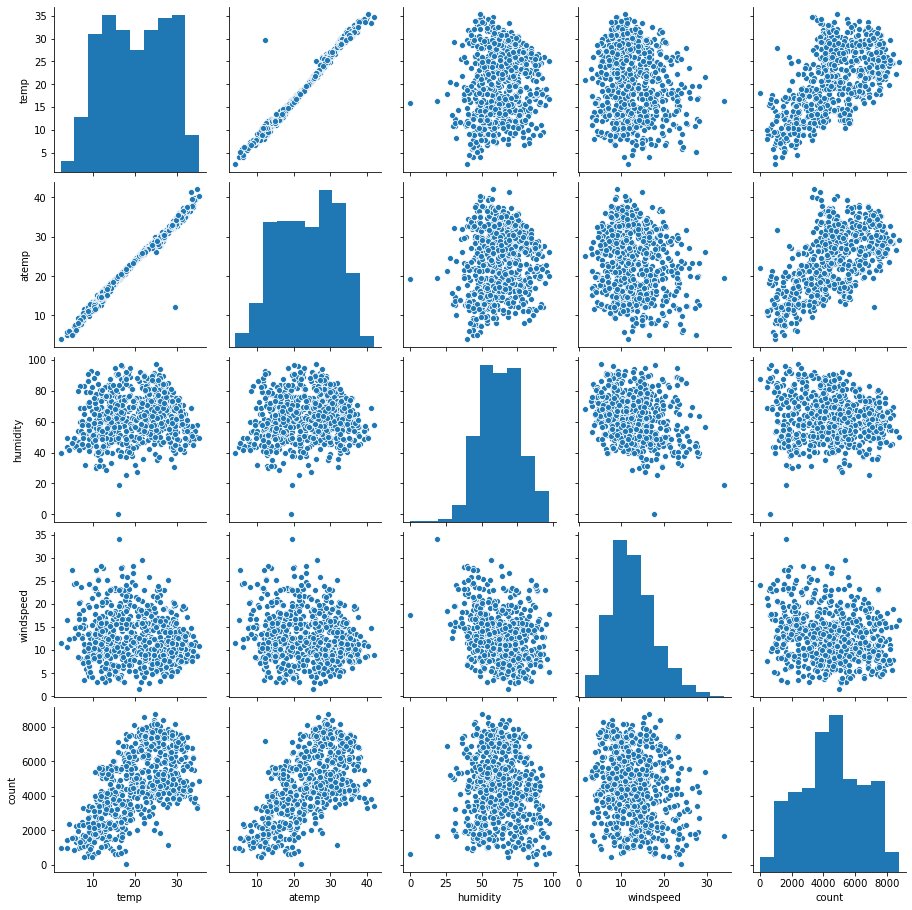

In [519]:
bike_num = bike[['temp','atemp','humidity','windspeed','count']]
sns.pairplot(bike_num , palette="pastel")
plt.show()

### INFERENCE:
The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'count'

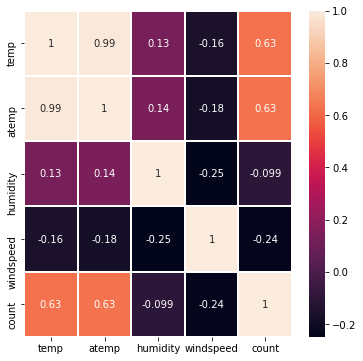

In [520]:
plt.figure(figsize = (6,6))
sns.heatmap(bike_num.corr(), annot=True, linewidth=1)

#  Step 4: Data Prepration

In [521]:
# Dummy Variable
months=pd.get_dummies(bike.months,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)

In [522]:
bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,months,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [523]:
bike.drop(['months', 'weekday', 'weathersit', 'season'], axis = 1, inplace = True)

In [524]:
bike.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [525]:
bike.head(3).shape

(3, 30)

In [526]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Aug             730 non-null    uint8  
 1   Dec             730 non-null    uint8  
 2   Feb             730 non-null    uint8  
 3   Jan             730 non-null    uint8  
 4   Jul             730 non-null    uint8  
 5   Jun             730 non-null    uint8  
 6   Mar             730 non-null    uint8  
 7   May             730 non-null    uint8  
 8   Nov             730 non-null    uint8  
 9   Oct             730 non-null    uint8  
 10  Sep             730 non-null    uint8  
 11  Monday          730 non-null    uint8  
 12  Saturday        730 non-null    uint8  
 13  Sunday          730 non-null    uint8  
 14  Thursday        730 non-null    uint8  
 15  Tuesday         730 non-null    uint8  
 16  Wednesday       730 non-null    uint8  
 17  Light_rainsnow  730 non-null    uin

#  Step 5: Splitting the Data into Training and Testing Sets


In [527]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)


In [528]:
print(df_train.shape)
print(df_test.shape)


(510, 30)
(219, 30)


### Rescaling the Features 

In [529]:
from sklearn.preprocessing import MinMaxScaler

In [530]:
scaler = MinMaxScaler()

In [531]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [532]:
df_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
653,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [533]:
df_train.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,...,0.245098,0.24902,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,...,0.430568,0.43287,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


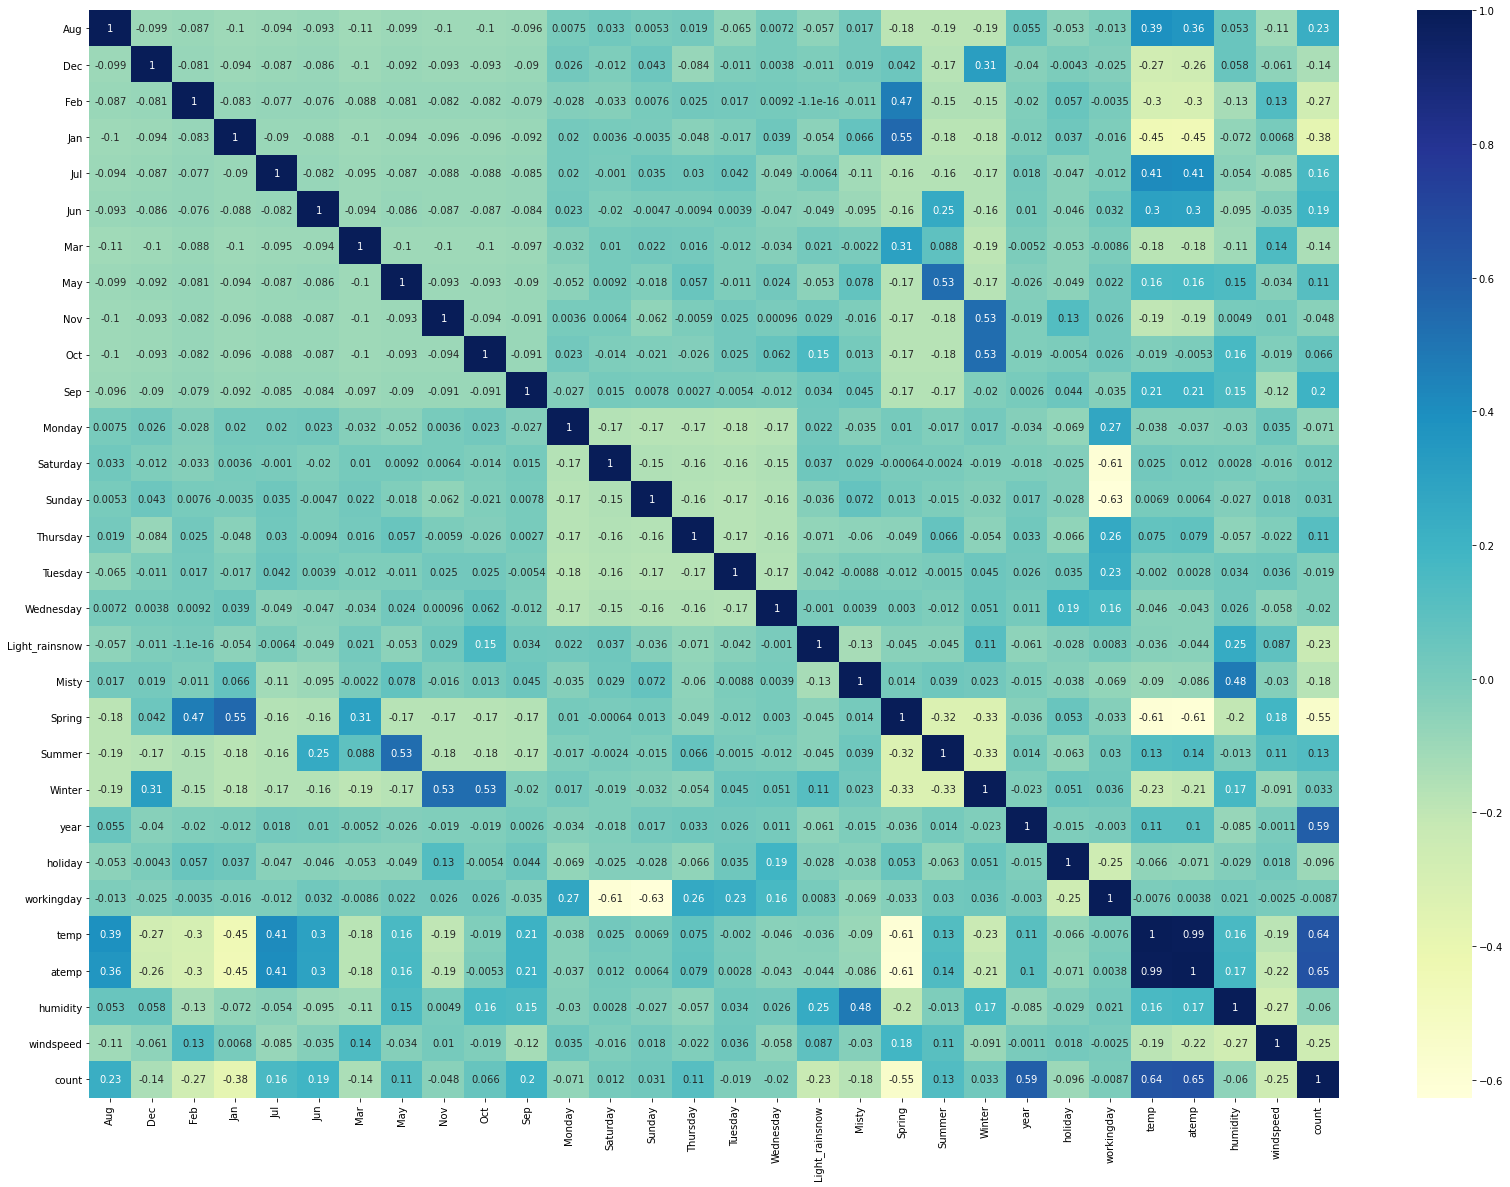

In [534]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (28,20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [535]:
y_train = df_train.pop('count')
X_train = df_train

# Step 6: Building a Linear Model 

Using the **LinearRegression function from SciKit Learn** for its compatibility with RFE

In [536]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [537]:
# Running RFE with the output number of the variable equal to 18
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 18)             
rfe = rfe.fit(X_train, y_train)

In [538]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 7),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 12),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Monday', False, 6),
 ('Saturday', True, 1),
 ('Sunday', False, 2),
 ('Thursday', False, 10),
 ('Tuesday', False, 5),
 ('Wednesday', False, 8),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [539]:
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Feb', 'Jan', 'Jul', 'Nov', 'Sep', 'Saturday', 'Light_rainsnow',
       'Misty', 'Spring', 'Summer', 'Winter', 'year', 'holiday', 'workingday',
       'temp', 'humidity', 'windspeed'],
      dtype='object')

In [540]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Jun', 'Mar', 'May', 'Oct', 'Monday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'atemp'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [541]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### model 1

In [542]:
import statsmodels.api as sm 

# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.0
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.88e-187
Time:                        04:57:02   Log-Likelihood:                 518.60
No. Observations:                 510   AIC:                            -999.2
Df Residuals:                     491   BIC:                            -918.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3474      0.038      9.

In [543]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### model 2

`Saturday` is insignificant in presence of other variables based on its high p value; can be dropped

In [544]:
X_train_new = X_train_rfe.drop(["Saturday"], axis = 1)

Rebuilding the model without `Saturday`

In [545]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

 # Running the linear model
lr = sm.OLS(y_train,X_train_lm).fit() 

#the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.2
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.60e-188
Time:                        04:57:10   Log-Likelihood:                 518.50
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     492   BIC:                            -924.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3443      0.037      9.

#### Model 3 

`Feb` is insignificant in presence of other variables based on its high pvalue; can be dropped

In [546]:
X_train_new = X_train_rfe.drop(['Saturday','Feb'], axis = 1)

Rebuilding the model without `Feb`

In [547]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [548]:
 # Running the linear model
lr = sm.OLS(y_train,X_train_lm).fit() 

In [549]:
#the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.5
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          4.55e-189
Time:                        04:57:17   Log-Likelihood:                 517.12
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     493   BIC:                            -928.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3329      0.036      9.

In [550]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.69
8,Spring,5.27
14,temp,4.43
10,Winter,3.83
9,Summer,2.76
15,humidity,1.94
4,Nov,1.76
2,Jan,1.68
7,Misty,1.59
1,Dec,1.50


#### Model 4

`Spring` is insignificant in presence of other variables based on its high VIF; can be dropped

In [551]:
X_train_new = X_train_rfe.drop(['Saturday','Feb','Spring'], axis = 1)

In [552]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [553]:
 # Running the linear model
lr = sm.OLS(y_train,X_train_lm).fit() 

In [554]:
#the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.5
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.42e-188
Time:                        04:57:22   Log-Likelihood:                 512.67
No. Observations:                 510   AIC:                            -993.3
Df Residuals:                     494   BIC:                            -925.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2681      0.029      9.

In [555]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.74
13,temp,2.33
9,Winter,2.08
14,humidity,1.91
4,Nov,1.70
2,Jan,1.67
7,Misty,1.58
1,Dec,1.48
8,Summer,1.44
3,Jul,1.43


#### Model 5 

`Nov` is insignificant in presence of other variables based on its high p value; can be dropped

In [556]:
X_train_new = X_train_rfe.drop(['Saturday','Feb','Spring','Nov'], axis = 1)

In [557]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [558]:
 # Running the linear model
lr = sm.OLS(y_train,X_train_lm).fit() 

In [559]:
#the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          6.53e-189
Time:                        04:57:27   Log-Likelihood:                 511.28
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     495   BIC:                            -929.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2620      0.029      9.

In [560]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.86
12,temp,2.25
13,humidity,1.91
2,Jan,1.63
6,Misty,1.57
8,Winter,1.55
3,Jul,1.43
7,Summer,1.43
1,Dec,1.26
5,Light_rainsnow,1.25


#### Model 6

`Dec` is insignificant in presence of other variables based on its high pvalue; can be dropped

In [561]:
X_train_new = X_train_rfe.drop(['Saturday','Feb','Spring','Nov','Dec'], axis = 1)

In [562]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [563]:
# Running the linear model
lr = sm.OLS(y_train,X_train_lm).fit() 

In [564]:
#the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.13e-189
Time:                        04:57:31   Log-Likelihood:                 510.33
No. Observations:                 510   AIC:                            -992.7
Df Residuals:                     496   BIC:                            -933.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2556      0.029      8.

In [565]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.46
11,temp,2.06
12,humidity,1.89
5,Misty,1.57
1,Jan,1.55
7,Winter,1.53
2,Jul,1.43
6,Summer,1.41
4,Light_rainsnow,1.24
3,Sep,1.19


#### Model 7

`Workingday` is insignificant in presence of other variables based on its high pvalue; can be dropped

In [566]:
X_train_new = X_train_rfe.drop(['Saturday','Feb','Spring','Nov','Dec','workingday'], axis = 1)

In [567]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

In [568]:
# Running the linear model
lr = sm.OLS(y_train,X_train_lm).fit() 

In [569]:
#the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          6.03e-190
Time:                        04:57:37   Log-Likelihood:                 508.17
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     497   BIC:                            -935.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2444      0.028      8.

In [570]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.60
10,temp,2.06
11,humidity,1.88
1,Jan,1.55
5,Misty,1.55
7,Winter,1.53
2,Jul,1.43
6,Summer,1.41
4,Light_rainsnow,1.24
3,Sep,1.19


#### Model 8

`Jan` is insignificant in presence of other variables; can be dropped

In [571]:
X_train_new = X_train_rfe.drop(['Saturday','Feb','Spring','Nov','Dec','workingday','Jan'], axis = 1)

In [572]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

In [573]:
# Running the linear model
lr = sm.OLS(y_train,X_train_lm).fit() 

In [574]:
#the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.89e-190
Time:                        04:57:39   Log-Likelihood:                 505.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     498   BIC:                            -936.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2257      0.027      8.

In [575]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.99
10,humidity,1.87
9,temp,1.60
4,Misty,1.55
1,Jul,1.43
5,Summer,1.33
6,Winter,1.29
3,Light_rainsnow,1.24
2,Sep,1.19
11,windspeed,1.18


#### INFERENCE:<br> 
This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values and VIF for all the predictors seems to be significant. For now, we will consider this as our final mode

### 6.1 The equation of best fitted surface based on model 8:

count = 0.2257 + (year × 0.2279)  + (temp × 0.5978) − (windspeed × 0.1892) + (summer × 0.0803) + (winter ×0.1357) (sep × 0.0959) - (july ×0.0481) − (light_rainbow × 0.2331) − (misty × 0.0517) - (humidity × 0.1825) -(holiday × 0.0994 )



## 6.2 Interpretation of Coefficients:

**year**: A coefficient value of ‘0.2279’ indicated that a unit increase in year variable, increases the bike hire numbers by 0.2279 units.

**temp**: A coefficient value of ‘0.5678’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.5978 units.

**light_rainbow**: A coefficient value of ‘0.2331’ indicated that, a unit increase in light_rainbow variable, decreases the bike hire numbers by 0.2331 units.

**misty**: A coefficient value of ‘ 0.0517’ indicated that, a unit increase in light_rainbow variable, decreases the bike hire numbers by  0.0517 units.


**winter**: A coefficient value of ‘0.1357’ indicated that, a unit increase in winter variable increases the bike hire numbers by 0.1357 units.

**windspeed**: A coefficient value of ‘0.1892’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1892 units.

**holiday**: A coefficient value of ‘0.0994’ indicated that, a unit increase in holiday variable decreases the bike hire numbers by 0.0994 units.

**humidity**: A coefficient value of ‘0.1825’ indicated that, a unit increase in workingday variable decreases the bike hire numbers by 0.1825 units.

**summer**: A coefficient value of ‘0.0803’ indicated that, a unit increase in summer variable decreases the bike hire numbers by 0.0803 units.

**Sep**: A coefficient value of ‘0.0959’ indicated that , a unit increase in sep variable increases the bike hire numbers by 0.0959 units.

**july**: A coefficient value of ‘-0.0481’ indicated that , a unit increase in july variable decreases the bike hire numbers by 0.0481 units.

**const**: The Constant value of ‘0.2257’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.2257 units.

## 6.3 Hypothesis Testing

      Hypothesis testing states that:

      H0:B1=B2=...=Bn=0
      H1: at least one Bi!=0

In [576]:
lr.params

const             0.225733
Jul              -0.048116
Sep               0.095936
Light_rainsnow   -0.233145
Misty            -0.051698
Summer            0.080346
Winter            0.135725
year              0.227942
holiday          -0.099419
temp              0.597751
humidity         -0.182550
windspeed        -0.189202
dtype: float64

From the model 8 summary, it is evident that all our coefficients are not equal to zero, which means we **REJECT the NULL HYPOTHESIS**

## 6.4 F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 237.6
- Prob (F-statistic): 3.89e-190

The F-Statistics value of 237.6 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

## 6.5 Model Validation 
Validating the assumption of **Linear Regression** Model :

1.Linear Relationship<BR>
2.Homoscedasticity<BR>
3.Absence of Multicollinearity<BR>
4.Independence of residuals<BR>
5.Normality of Errors<BR>


### 6.5.1. LINEAR RELATIONSHIP

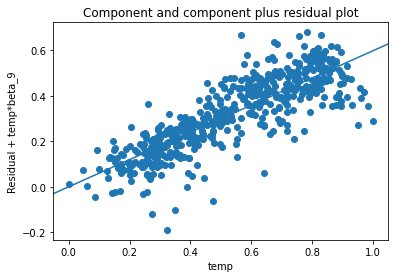

In [577]:
sm.graphics.plot_ccpr(lr, 'temp')
plt.show()

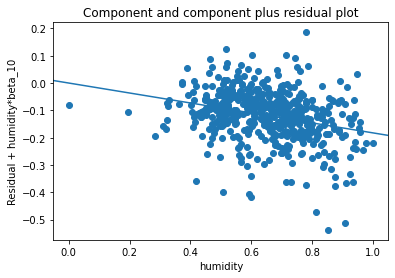

In [578]:
sm.graphics.plot_ccpr(lr, 'humidity')
plt.show()

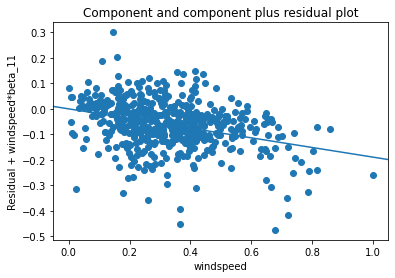

In [579]:
sm.graphics.plot_ccpr(lr, 'windspeed')
plt.show()

**Inference**:
The above plots represents the relationship between the model and the predictor variables. Hence, linearity is well preserved.

### 6.5.2. HOMOSCEDASTICITY

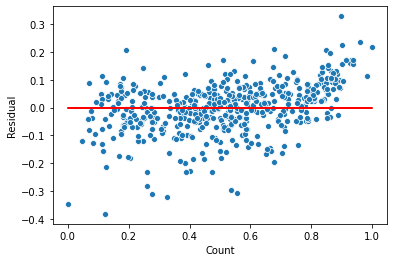

In [580]:
y_train_pred = lr.predict(X_train_lm)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

**Inference**: There is no visible pattern in residual values, thus homoscedacity is well preserved

### 6.5.3 CHECKING FOR MULTICOLINEARITY

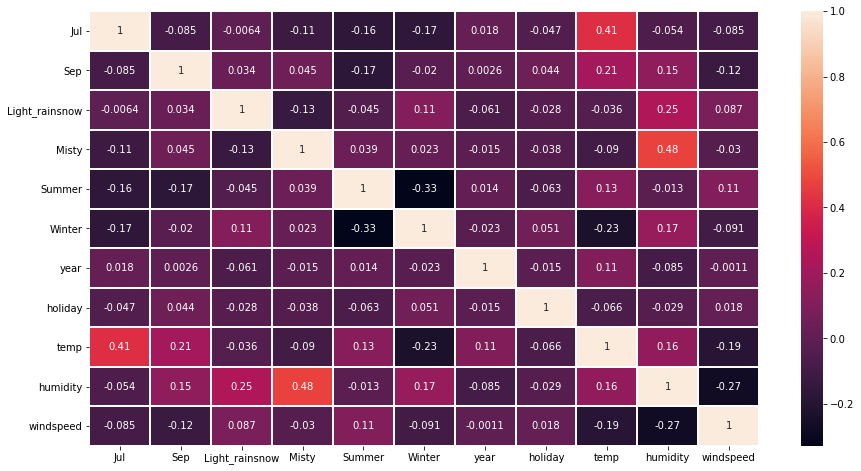

In [581]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True,linewidth =1)
plt.show()

**Inference**: There are no variables which are highly correlated with each other, thus absence of multi collinearity is well preserved



In [582]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.99
10,humidity,1.87
9,temp,1.60
4,Misty,1.55
1,Jul,1.43
5,Summer,1.33
6,Winter,1.29
3,Light_rainsnow,1.24
2,Sep,1.19
11,windspeed,1.18


**Inference**: All the predictor variables have VIF value less than 5. So we can consider that there is insignificant multicolinearity among the predictor variables.

## 6.5.4. Independence of residuals

In [583]:
print('The Durbin-Watson value for Final Model lr 8 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))


The Durbin-Watson value for Final Model lr 8 is 2.0609


**Inference**: There is almost no autocorrelation.

## 6.5.5. Normality of error

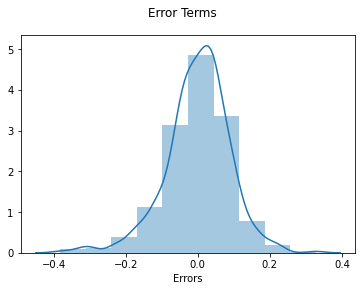

In [584]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 10)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()


**Inference**: we can conclude that error terms are following a normal distribution    

# Step 7: Residual Analysis of the train data

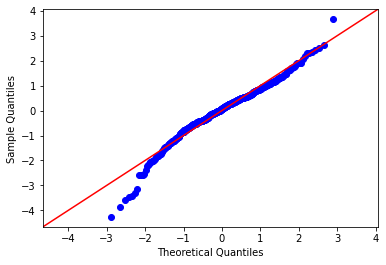

In [585]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

# Step 8: Making Predictions

#### Applying the scaling on the test sets

Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, as we want to use the metrics that the model learned from the training data to be applied on the test data.In other words, we want to prevent the information leak from train to test dataset.

In [586]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [587]:
df_test.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300
535,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421
299,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0.496221,0.492359,0.777843,0.443398,0.278853
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512
152,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0.821739,0.749249,0.070765,0.682387,0.569148


In [588]:
y_test = df_test.pop('count')
X_test = df_test

In [589]:
X_train_lm = X_train_lm.drop(['const'], axis = 1)

In [590]:
col1=X_train_lm.columns
X_test=X_test[col1]

In [591]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

X_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           219 non-null    float64
 1   Jul             219 non-null    uint8  
 2   Sep             219 non-null    uint8  
 3   Light_rainsnow  219 non-null    uint8  
 4   Misty           219 non-null    uint8  
 5   Summer          219 non-null    uint8  
 6   Winter          219 non-null    uint8  
 7   year            219 non-null    int64  
 8   holiday         219 non-null    int64  
 9   temp            219 non-null    float64
 10  humidity        219 non-null    float64
 11  windspeed       219 non-null    float64
dtypes: float64(4), int64(2), uint8(6)
memory usage: 13.3 KB


In [592]:
# Making predictions
y_pred = lr.predict(X_test_lm)

Text(0, 0.5, 'y_pred')

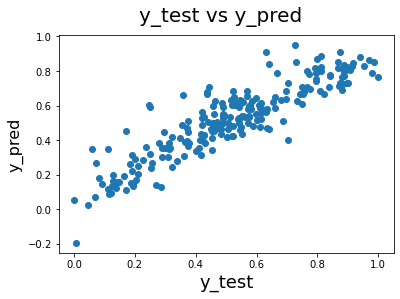

In [593]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [594]:
from sklearn.metrics import r2_score
r2 = round(r2_score(y_test, y_pred),4)
r2

0.8039

In [595]:
# Adj R2
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7935

## Calculating RMSE for the selected Model

In [596]:
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.1055

## Calculating MSE for the selected Model

In [597]:
from sklearn.metrics import mean_absolute_error
MSE = round(mean_absolute_error(y_test, y_pred),4)
MSE

0.0795

# Final Result Comparison

- *Train R^2* : **0.840**
- *Train Adjusted R^2* : **0.836**
- *Test R^2* : **0.8039**
- *Test Adjusted R^2* : **0.7935**

**This seems to be a really good model that can very well 'Generalize' various datasets.**
